In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from datetime import datetime
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import grangercausalitytests
import statsmodels.api as sm
import statsmodels.stats.diagnostic

In [198]:
all_data = pd.read_csv('./data/2021MCMProblemC_DataSet.csv', encoding='utf-8', index_col='Detection Date')
# all_data
## for the first question, only keep track of the sightings in 2019 and 2020
all_data.index = pd.to_datetime(all_data.index, errors='coerce')
all_data = all_data.sort_values(by = 'Detection Date', ascending=True)
data = all_data[(all_data.index > "2020/1/1") & (all_data['Lab Status'] == "Unverified") | (all_data['Lab Status'] == "Positive ID")]
data
train_data = data[0:2190]
test_data = data[2191:]
train_data
test_data


,GlobalID,Notes,Lab Status,Lab Comments,Submission Date,Latitude,Longitude
Detection Date,,,,,,,
2020-10-20,{77D116BB-DC8B-415E-9183-4697A44F878C},Flew into wood pile inside startup market and ...,Unverified,,2020/10/20,47.867030,-121.744820
2020-10-21,{A0909E9E-FBC6-4DAA-9B25-D44C990A7B3B},Saw only a side view about 8 inches from ear. ...,Unverified,,2020/10/22,48.957608,-122.651558
2020-10-21,{A2B93362-E28D-43E8-A0B6-F8AE4F3903C2},About 1 1/2 inches long on the side of the bui...,Unverified,Thanks for the submission. Please feel free to...,2020/10/21,48.892087,-122.590774
2020-10-22,{9797D62C-E3F8-42B8-8DA0-665F074A27CF},It was about 2 inches long and appeared to be ...,Unverified,,2020/10/22,48.893080,-122.643823
2020-10-28,{390FCB4C-2CED-49D6-81A4-73DFB8267C00},On a walk we observed a large hornet. It struc...,Unverified,,2020/10/3,47.343386,-122.166631
2020-11-20,{FDD2DEC0-0CB8-4FEB-8AE6-BF5A70534E5D},"Large bodied, with striping bumping against th...",Unverified,,2020/6/12,48.830623,-122.538817
2020-12-20,{8A974AA4-B09C-4D0E-98CC-AA3CFE105110},This hornet stung me as I stepped near him on ...,Unverified,Thanks for the submission. Glad you sought med...,2020/9/23,47.629840,-120.689450


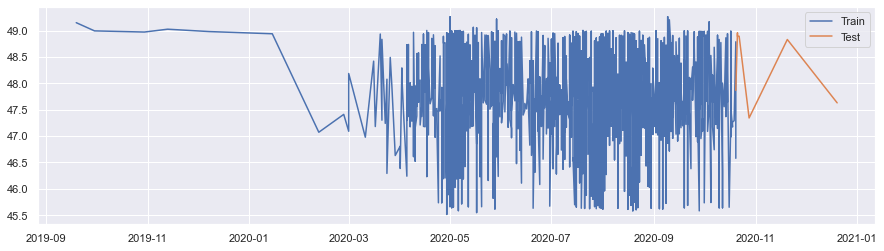

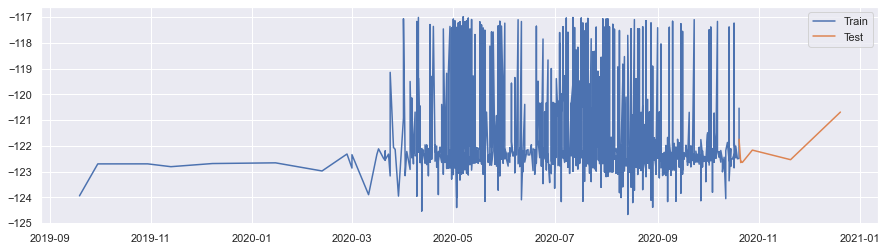

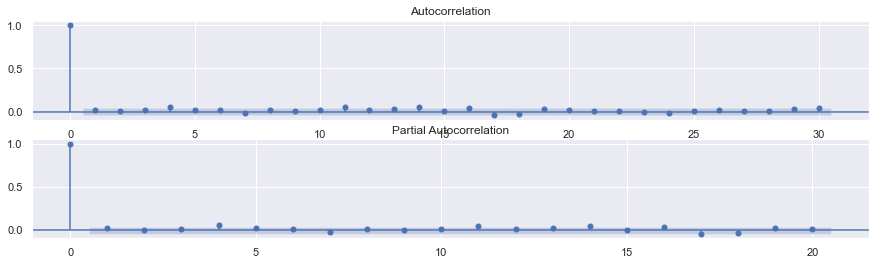

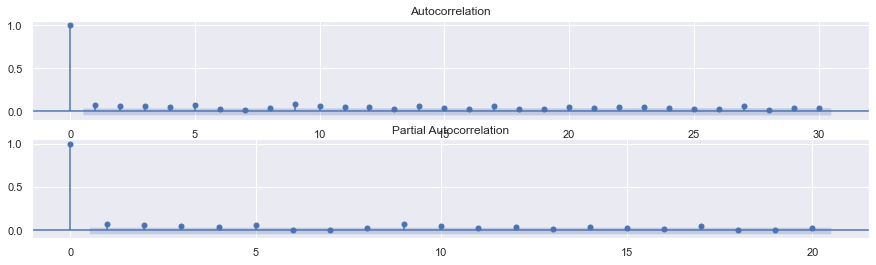

ADF test statistic: -21.93403622576877
p-value: 0.0
ADF test statistic: -11.691868269910387
p-value: 1.6453905936457369e-21

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.3339  , p=0.0680  , df_denom=2194, df_num=1
ssr based chi2 test:   chi2=3.3385  , p=0.0677  , df=1
likelihood ratio test: chi2=3.3360  , p=0.0678  , df=1
parameter F test:         F=3.3339  , p=0.0680  , df_denom=2194, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.5344  , p=0.0795  , df_denom=2191, df_num=2
ssr based chi2 test:   chi2=5.0803  , p=0.0789  , df=2
likelihood ratio test: chi2=5.0745  , p=0.0791  , df=2
parameter F test:         F=2.5344  , p=0.0795  , df_denom=2191, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.6057  , p=0.1860  , df_denom=2188, df_num=3
ssr based chi2 test:   chi2=4.8326  , p=0.1845  , df=3
likelihood ratio test: chi2=4.8273  , p=0.1849  , df=3
parameter F test:         F=1.6057  , 

{1: ({'ssr_ftest': (3.3339298637944528, 0.06800039521073192, 2194.0, 1),
   'ssr_chi2test': (3.3384885646109446, 0.06767674857778654, 1),
   'lrtest': (3.3359546028777913, 0.0677810641611082, 1),
   'params_ftest': (3.3339298637932355, 0.06800039521076967, 2194.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (2.5343861212672394, 0.07954287892780859, 2191.0, 2),
   'ssr_chi2test': (5.080339500048249, 0.078853013353614, 2),
   'lrtest': (5.07447198825048, 0.0790846885197101, 2),
   'params_ftest': (2.534386121267258, 0.07954287892780859, 2191.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (1.6057425874398135, 0.1860111057741756, 2188.0, 3),
   'ssr_chi2test': (4.832639368506019, 0.18447039682769278, 3),
   'lrtest': (4.827327254422926, 0.1848866262667173, 3),
   'params_ftest': (1.6057425874392293, 0.1860111057743449, 2188.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0.,

In [199]:
## data is the data we will use for the pridiction
plt.figure(figsize=(15,4))
plt.grid(True)
plt.plot(train_data['Latitude'], label='Train')
plt.plot(test_data['Latitude'], label='Test')
plt.legend(loc='best')
plt.show()

plt.figure(figsize=(15,4))
plt.grid(True)
plt.plot(train_data['Longitude'], label='Train')
plt.plot(test_data['Longitude'], label='Test')
plt.legend(loc='best')
plt.show()

## stationarity test
f = plt.figure(facecolor="white", figsize=(15, 4))
f1 = f.add_subplot(211)
plot_acf(train_data['Latitude'], lags=30, ax = f1)
f2 = f.add_subplot(212)
plot_pacf(train_data['Latitude'], lags=20, ax =f2)
plt.show()

f = plt.figure(facecolor="white", figsize=(15, 4))
f1 = f.add_subplot(211)
plot_acf(train_data['Longitude'], lags=30, ax = f1)
f2 = f.add_subplot(212)
plot_pacf(train_data['Longitude'], lags=20, ax =f2)
plt.show()

## ADF test
## null hypothesis: series is not stationary
adfuller_test = adfuller(data['Latitude'], autolag="AIC")
print("ADF test statistic: {}".format(adfuller_test[0]))
print("p-value: {}".format(adfuller_test[1]))
adfuller_test = adfuller(data['Longitude'], autolag="AIC")
print("ADF test statistic: {}".format(adfuller_test[0]))
print("p-value: {}".format(adfuller_test[1]))

## Granger causality test
## null hypothesis: Longitude has no impact on Latitude
grangercausalitytests(data[['Latitude','Longitude']], maxlag=5)



+ It can be seen that both the 0-order autocorrelation coefficient and the 0-order partial autocorrelation coefficient are constant at 1.In the following two figures, the autocorrelation coefficient and partial autocorrelation coefficient rapidly decrease from 1 to near 0, and then fluctuate slightly around the 0 axis with the rise of the order, which basically meets the requirements of stationarity
+ from the adfuller test we can also find out the p-value is much smaller that 1% so that we reject the null hypothesis which means the two variables basically meets the requirements of stationarity
+ also from the grangercausalitytests, p-value at lag = 4 < 0.05 reject null hypothesis, using Longitude to predict Latitude is helpful


E:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


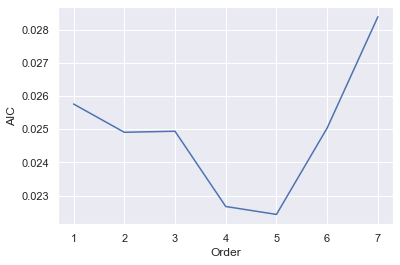

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 05, Feb, 2021
Time:                     19:46:15
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                  0.0797167
Nobs:                     2185.00    HQIC:                 0.0433719
Log likelihood:          -6203.27    FPE:                    1.02269
AIC:                    0.0224324    Det(Omega_mle):         1.01247
--------------------------------------------------------------------
Results for equation Latitude
                  coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------
const               38.466102         3.112645           12.358           0.000
L1.Latitude          0.008909         0.021612            0.412           0.680
L1.Longitude        -0.016684         0.010984           -1.5

In [200]:
train_data = pd.DataFrame(train_data, columns = ['Latitude', 'Longitude'])
## model
forecasting_model = VAR(train_data)
results_aic = []
for p in range(1,8):
  results = forecasting_model.fit(p)
  results_aic.append(results.aic)
import seaborn as sns
sns.set()
plt.plot(list(np.arange(1,8,1)), results_aic)
plt.xlabel("Order")
plt.ylabel("AIC")
plt.show()

results = forecasting_model.fit(5)
results.summary()

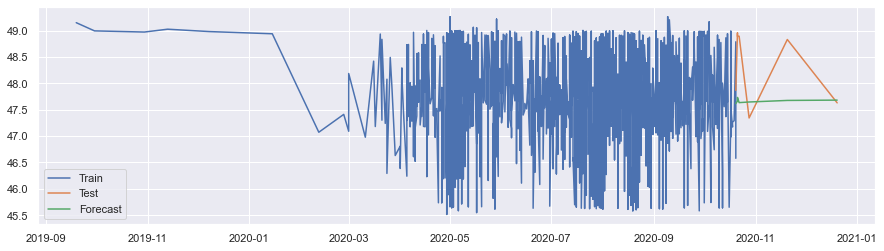

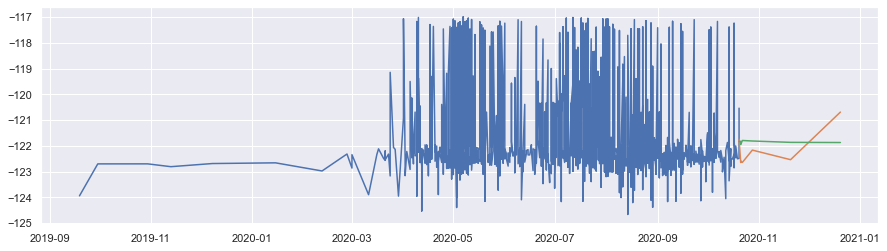

In [203]:
laaged_values = train_data.values[-5:]
forecast = pd.DataFrame(results.forecast(y= laaged_values, steps=7), columns= ['Latitude', 'Longitude'], index = test_data.index)
forecast
# plt.figure(figsize=(15,4))
# plt.grid(True)
# plt.plot(train_data['Latitude'], label='Train')
# plt.plot(test_data['Latitude'], label='Test')
# plt.plot(forecast['Latitude'], label='Forecast')
# plt.legend(loc='best')
# plt.show()

plt.figure(figsize=(15,4))
plt.grid(True)
plt.plot(train_data['Latitude'], label='Train')
plt.plot(test_data['Latitude'], label='Test')
plt.plot(forecast['Latitude'], label='Forecast')
plt.legend(loc='best')
plt.show()

plt.figure(figsize=(15,4))
plt.grid(True)
plt.plot(train_data['Longitude'], label='Train')
plt.plot(test_data['Longitude'], label='Test')
plt.plot(forecast['Longitude'], label='Forecast')

# plt.legend(loc='best')
# plt.show()
